<a href="https://colab.research.google.com/github/bhkpriyanka/EVA4/blob/master/Week8/S8_ResnetArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week8/PythonFiles/')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/EVA4_2020/Week8/PythonFiles/']


In [0]:
from all_imports import *
import data_loaders as dl                         # Loading CIFAR10 data into train/test dataloaders
import resnet_model_file as mfile                 # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model

In [4]:
trainloader, testloader = dl.train_test_loaders(64, 5)   #arguments are batchsize, rotation value

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
dp = [0.15,0.15,0.2,0.2] ##dropout values
model = mfile.ResNet18(dp).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [7]:
model = mfile.ResNet18(dp).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    tra,trl = ttfunc.train(model, device, trainloader, optimizer, epoch)
    #train_losses.extend(a)
    #train_acc.extend(b)
    tea,tel = ttfunc.test(model, device, testloader,classes)
    #test_losses.extend(c)
    #test_acc.extend(d)
    scheduler.step()
    print('')


  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.150298833847046 Batch_id=781 Accuracy=28.17: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0248, Accuracy: 4140/10000 (41.40%)


EPOCH: 2


Loss=1.5966774225234985 Batch_id=781 Accuracy=46.03: 100%|██████████| 782/782 [00:34<00:00, 22.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0211, Accuracy: 5097/10000 (50.97%)


EPOCH: 3


Loss=1.4073090553283691 Batch_id=781 Accuracy=55.32: 100%|██████████| 782/782 [00:34<00:00, 22.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 5788/10000 (57.88%)


EPOCH: 4


Loss=1.2261829376220703 Batch_id=781 Accuracy=63.33: 100%|██████████| 782/782 [00:34<00:00, 22.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0144, Accuracy: 6782/10000 (67.82%)


EPOCH: 5


Loss=0.6967671513557434 Batch_id=781 Accuracy=68.18: 100%|██████████| 782/782 [00:34<00:00, 22.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 7254/10000 (72.54%)


EPOCH: 6


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 7410/10000 (74.10%)


EPOCH: 7


Loss=0.39297041296958923 Batch_id=781 Accuracy=75.31: 100%|██████████| 782/782 [00:34<00:00, 22.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 7804/10000 (78.04%)


EPOCH: 8


Loss=1.373530387878418 Batch_id=781 Accuracy=77.70: 100%|██████████| 782/782 [00:34<00:00, 22.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 8012/10000 (80.12%)


EPOCH: 9


Loss=0.6257967948913574 Batch_id=781 Accuracy=79.88: 100%|██████████| 782/782 [00:34<00:00, 22.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 8187/10000 (81.87%)


EPOCH: 10


Loss=0.48776760697364807 Batch_id=781 Accuracy=81.61: 100%|██████████| 782/782 [00:35<00:00, 23.80it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 8146/10000 (81.46%)


EPOCH: 11


Loss=0.3905644416809082 Batch_id=781 Accuracy=85.36: 100%|██████████| 782/782 [00:34<00:00, 22.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 8585/10000 (85.85%)


EPOCH: 12


Loss=0.501103401184082 Batch_id=781 Accuracy=86.25: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8636/10000 (86.36%)


EPOCH: 13


Loss=0.3487904369831085 Batch_id=781 Accuracy=86.74: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8672/10000 (86.72%)


EPOCH: 14


Loss=0.5686886310577393 Batch_id=781 Accuracy=87.03: 100%|██████████| 782/782 [00:34<00:00, 22.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8694/10000 (86.94%)


EPOCH: 15


Loss=0.40081724524497986 Batch_id=781 Accuracy=87.44: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8711/10000 (87.11%)


EPOCH: 16


Loss=0.12237614393234253 Batch_id=781 Accuracy=87.55: 100%|██████████| 782/782 [00:34<00:00, 22.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8741/10000 (87.41%)


EPOCH: 17


Loss=0.4604853093624115 Batch_id=781 Accuracy=87.99: 100%|██████████| 782/782 [00:34<00:00, 22.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8727/10000 (87.27%)


EPOCH: 18


Loss=0.22890082001686096 Batch_id=781 Accuracy=88.09: 100%|██████████| 782/782 [00:34<00:00, 22.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8744/10000 (87.44%)


EPOCH: 19


Loss=0.6904873251914978 Batch_id=781 Accuracy=88.31: 100%|██████████| 782/782 [00:34<00:00, 22.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8735/10000 (87.35%)


EPOCH: 20


Loss=0.09879089891910553 Batch_id=781 Accuracy=88.67: 100%|██████████| 782/782 [00:34<00:00, 22.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8762/10000 (87.62%)


EPOCH: 21


Loss=0.1954169124364853 Batch_id=781 Accuracy=89.28: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8786/10000 (87.86%)


EPOCH: 22


Loss=0.10236484557390213 Batch_id=781 Accuracy=89.53: 100%|██████████| 782/782 [00:35<00:00, 22.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8780/10000 (87.80%)


EPOCH: 23


Loss=0.3209694027900696 Batch_id=781 Accuracy=89.37: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8777/10000 (87.77%)


EPOCH: 24


Loss=0.29714351892471313 Batch_id=781 Accuracy=89.36: 100%|██████████| 782/782 [00:34<00:00, 22.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8797/10000 (87.97%)


EPOCH: 25


Loss=0.2669198215007782 Batch_id=781 Accuracy=89.50: 100%|██████████| 782/782 [00:34<00:00, 22.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 8776/10000 (87.76%)


EPOCH: 26


Loss=0.09272219240665436 Batch_id=781 Accuracy=89.51: 100%|██████████| 782/782 [00:34<00:00, 22.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8792/10000 (87.92%)


EPOCH: 27


Loss=0.21923089027404785 Batch_id=781 Accuracy=89.58: 100%|██████████| 782/782 [00:34<00:00, 22.39it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 8809/10000 (88.09%)


EPOCH: 28


Loss=0.0818018689751625 Batch_id=781 Accuracy=89.60: 100%|██████████| 782/782 [00:34<00:00, 22.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8789/10000 (87.89%)


EPOCH: 29


Loss=0.12163016945123672 Batch_id=781 Accuracy=89.53: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8784/10000 (87.84%)


EPOCH: 30


Loss=0.39371156692504883 Batch_id=781 Accuracy=89.47: 100%|██████████| 782/782 [00:34<00:00, 22.52it/s]



Test set: Average loss: 0.0058, Accuracy: 8782/10000 (87.82%)




'fig, axs = plt.subplots(2,2,figsize=(15,10))\naxs[0, 0].plot(train_losses)\naxs[0, 0].set_title("Training Loss")\naxs[1, 0].plot(train_acc)\naxs[1, 0].set_title("Training Accuracy")\naxs[0, 1].plot(test_losses)\naxs[0, 1].set_title("Test Loss")\naxs[1, 1].plot(test_acc)\naxs[1, 1].set_title("Test Accuracy")'

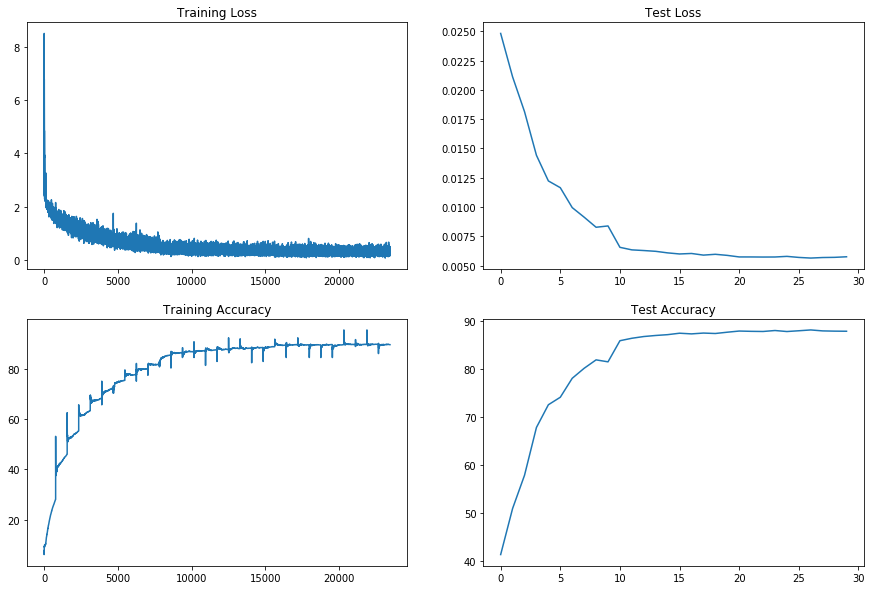

In [8]:
mp.train_test_plots(trl,tra,tel,tea)
'''fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")'''

------------------------------------------------------------
Model accuracy on 10000 test images: 87.82%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 89.30
car        - 95.30
bird       - 83.00
cat        - 76.60
deer       - 85.30
dog        - 81.60
frog       - 89.00
horse      - 91.00
ship       - 93.80
truck      - 93.30
 


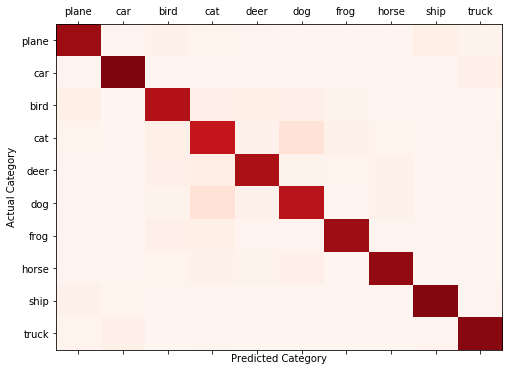

In [9]:
tperform.test_performance(model, testloader, device, classes)

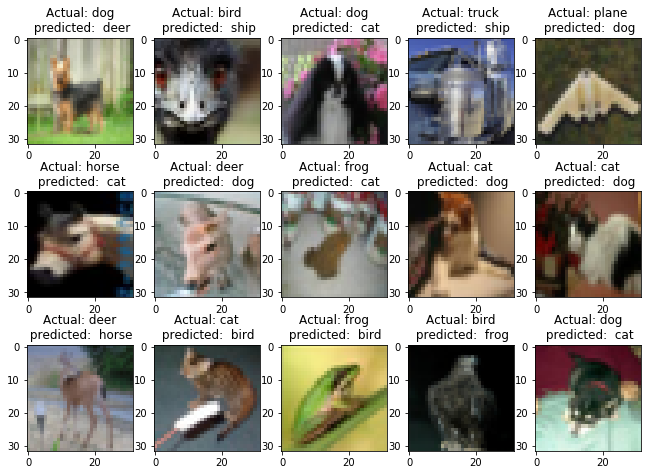

In [10]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)